# PHASE 1 (Preprocessing)

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the training set

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


## Feature Scaling

In [5]:
# recommended to use normalization and not standadisation
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled = sc.fit_transform(training_set)

In [6]:
scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creating a DataStructure with 120 timesteps, 1 output

In [7]:
X_train = []
y_train = []
for i in range(120, 1258):
    X_train.append(scaled[i-120: i, 0]) # memorize what happened in the prev 60 rows
    y_train.append(scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.0180445 , 0.0180817 ,
        0.00710618],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.0180817 , 0.00710618,
        0.0064923 ],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.00710618, 0.0064923 ,
        0.00225091],
       ...,
       [0.78201503, 0.79792023, 0.81851328, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.79792023, 0.81851328, 0.82688444, ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.81851328, 0.82688444, 0.82308952, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [9]:
y_train

array([0.0064923 , 0.00225091, 0.00682714, ..., 0.95725128, 0.93796041,
       0.93688146])

## Reshaping

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.0180445 ],
        [0.0180817 ],
        [0.00710618]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.0180817 ],
        [0.00710618],
        [0.0064923 ]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.00710618],
        [0.0064923 ],
        [0.00225091]],

       ...,

       [[0.78201503],
        [0.79792023],
        [0.81851328],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.79792023],
        [0.81851328],
        [0.82688444],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.81851328],
        [0.82688444],
        [0.82308952],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

# PHASE 2 (Build the RNN)

## Importing the libraries

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Initailizing the RNN

In [13]:
regressor = Sequential()

## Adding the first LSTM layer

In [14]:
regressor.add(LSTM(units = 70, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2)) # the rate is the percentage of neurons that will be ignored

## Adding a second LSTM layer

In [15]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(rate = 0.2)) # the rate is the percentage of neurons that will be ignored

## Adding a third LSTM layer

In [16]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(rate = 0.2)) # the rate is the percentage of neurons that will be ignored

## Adding a fourth LSTM layer

In [17]:
regressor.add(LSTM(units = 70, return_sequences = False))
regressor.add(Dropout(rate = 0.2)) # the rate is the percentage of neurons that will be ignored

## Adding the output layer

In [18]:
regressor.add(Dense(units = 1))

## Compiling the RNN

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting the RNN to the training set

In [20]:
regressor.fit(X_train, y_train, epochs = 130, batch_size = 32)

Epoch 1/130
36/36 [==============================] - 22s 320ms/step - loss: 0.0391
Epoch 2/130
36/36 [==============================] - 10s 269ms/step - loss: 0.0064
Epoch 3/130
36/36 [==============================] - 11s 294ms/step - loss: 0.0050
Epoch 4/130
36/36 [==============================] - 11s 302ms/step - loss: 0.0044
Epoch 5/130
36/36 [==============================] - 11s 299ms/step - loss: 0.0044
Epoch 6/130
36/36 [==============================] - 11s 297ms/step - loss: 0.0045
Epoch 7/130
36/36 [==============================] - 10s 284ms/step - loss: 0.0039
Epoch 8/130
36/36 [==============================] - 11s 302ms/step - loss: 0.0049
Epoch 9/130
36/36 [==============================] - 11s 305ms/step - loss: 0.0039
Epoch 10/130
36/36 [==============================] - 9s 246ms/step - loss: 0.0043
Epoch 11/130
36/36 [==============================] - 11s 293ms/step - loss: 0.0038
Epoch 12/130
36/36 [==============================] - 10s 289ms/step - loss: 0.0039
Ep

# PHASE 3 (Making Predictions & Visualizing results)

## Get the real stock price of 2017

In [21]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

## Getting the predicted stock price of 2017

### Preprocessing the test set

In [22]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120: i, 0]) # memorize what happened in the prev 60 rows
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [23]:
predicted_stock_price

array([[759.27954],
       [756.6432 ],
       [760.57837],
       [761.75665],
       [765.929  ],
       [773.1871 ],
       [776.3571 ],
       [774.9911 ],
       [775.135  ],
       [776.0863 ],
       [776.8307 ],
       [776.77844],
       [776.6035 ],
       [777.71783],
       [778.6283 ],
       [786.8109 ],
       [794.1233 ],
       [800.12213],
       [799.71576],
       [788.58307]], dtype=float32)

### Visualizing the predicted values

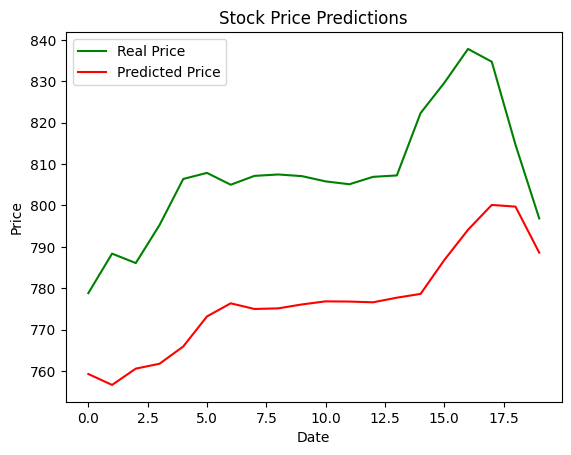

In [24]:
plt.plot(real_stock_price, color='green', label = 'Real Price')
plt.plot(predicted_stock_price, color='red', label = 'Predicted Price')
plt.title("Stock Price Predictions")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()